## (1) First Approach for Data Intake

Using imzip to read from zip file by file name, then converting image to a numpy array, then reshaping the image

In [1]:
# skimage imports
from skimage import data, color, filters, morphology, graph, measure
from skimage.filters import threshold_otsu, threshold_local, try_all_threshold
# scipy for image
from scipy import ndimage as ndi
# visualization tools
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# imports for reading from zip files
import zipfile
from PIL import Image
# array imports
import numpy as np

In [3]:
zip = zipfile.ZipFile('Base11.zip')
zip.namelist()

['Base11/',
 'Base11/20051019_38557_0100_PP.tif',
 'Base11/20051020_43808_0100_PP.tif',
 'Base11/20051020_43832_0100_PP.tif',
 'Base11/20051020_43882_0100_PP.tif',
 'Base11/20051020_43906_0100_PP.tif',
 'Base11/20051020_44261_0100_PP.tif',
 'Base11/20051020_44284_0100_PP.tif',
 'Base11/20051020_44338_0100_PP.tif',
 'Base11/20051020_44349_0100_PP.tif',
 'Base11/20051020_44400_0100_PP.tif',
 'Base11/20051020_44431_0100_PP.tif',
 'Base11/20051020_44598_0100_PP.tif',
 'Base11/20051020_44636_0100_PP.tif',
 'Base11/20051020_44692_0100_PP.tif',
 'Base11/20051020_44714_0100_PP.tif',
 'Base11/20051020_44762_0100_PP.tif',
 'Base11/20051020_44782_0100_PP.tif',
 'Base11/20051020_44843_0100_PP.tif',
 'Base11/20051020_44901_0100_PP.tif',
 'Base11/20051020_44923_0100_PP.tif',
 'Base11/20051020_44982_0100_PP.tif',
 'Base11/20051020_45004_0100_PP.tif',
 'Base11/20051020_45050_0100_PP.tif',
 'Base11/20051020_45068_0100_PP.tif',
 'Base11/20051020_45110_0100_PP.tif',
 'Base11/20051020_45137_0100_PP.tif',


In [4]:
def deflatten(names):
    names.sort(key=lambda name:len(name.split('/')))
    deflattened = []
    while len(names) > 0:
        name = names[0]
        if name[-1] == '/':
            subnames = [subname[len(name):] for subname in names if subname.startswith(name) and subname != name]
            for subname in subnames:
                names.remove(name+subname)
            deflattened.append((name, deflatten(subnames)))
        else:
            deflattened.append(name)
        names.remove(name)
    return deflattened

In [5]:
list_img = deflatten(zip.namelist())

In [6]:
list_img[0][1][1]

'20051020_43808_0100_PP.tif'

In [7]:
imgzip = zipfile.ZipFile('Base11.zip')
ifile = imgzip.open('Base11/'+list_img[0][1][0])
img = Image.open(ifile)

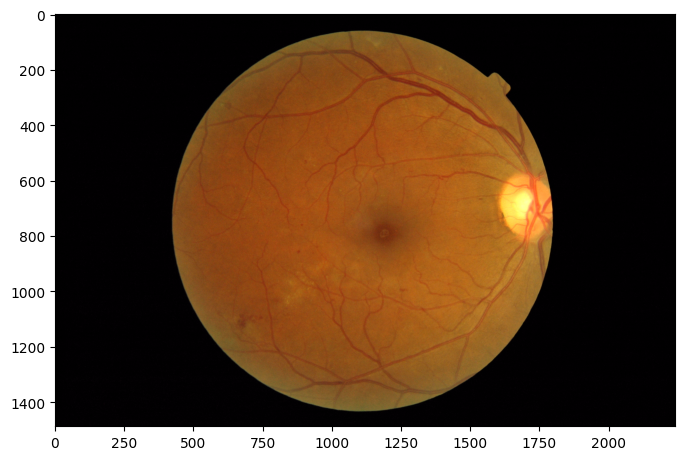

In [8]:
plt.figure(figsize=(8,8))
plt.imshow(img, cmap='gray');

In [9]:
img_narray = np.asarray(img)

In [10]:
img_narray.shape #Apparently the image is a RGB-3 colored (H, W, D)

(1488, 2240, 3)

In [11]:
type(img_narray)

numpy.ndarray

In [12]:
# Dimensions: [m, n, 3]
new_img = img_narray.transpose()
# Dimensions: [3, n, m]
new_img = img_narray.reshape(img_narray.shape[0], (img_narray.shape[1]*img_narray.shape[2]))

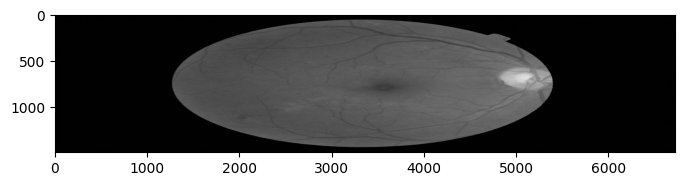

In [13]:
plt.figure(figsize=(8,8))
plt.imshow(new_img, cmap='gray');

In [14]:
new_img.shape

(1488, 6720)

## (2) Second Approach for Data Intake

Using plt reading and numpy, skimage for operations

In [15]:
def show_image(image, title="Image", cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()
    print(type(image), image.shape)

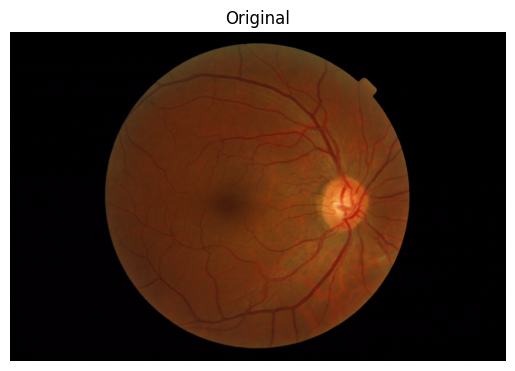

<class 'numpy.ndarray'> (1488, 2240, 3)


In [16]:
img_nparray = plt.imread('20051020_43808_0100_PP.tif')
show_image(img_nparray, title='Original')

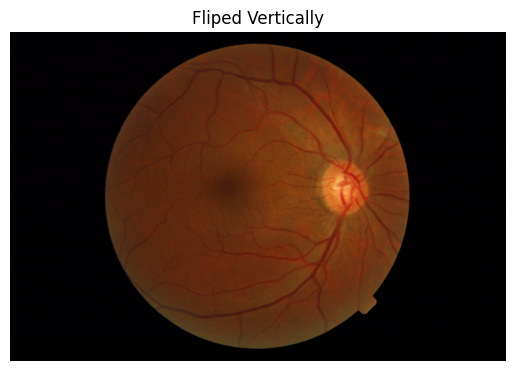

<class 'numpy.ndarray'> (1488, 2240, 3)


In [17]:
img_flipud = np.flipud(img_nparray)
img_fliplr = np.fliplr(img_nparray)
show_image(img_flipud, title='Fliped Vertically') # fliplr to flip horizontally

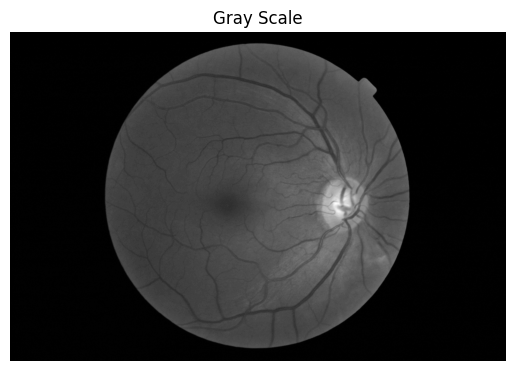

<class 'numpy.ndarray'> (1488, 2240)


In [18]:
img_gray = color.rgb2gray(img_nparray)
show_image(img_gray, title='Gray Scale')

#### RGB Channels

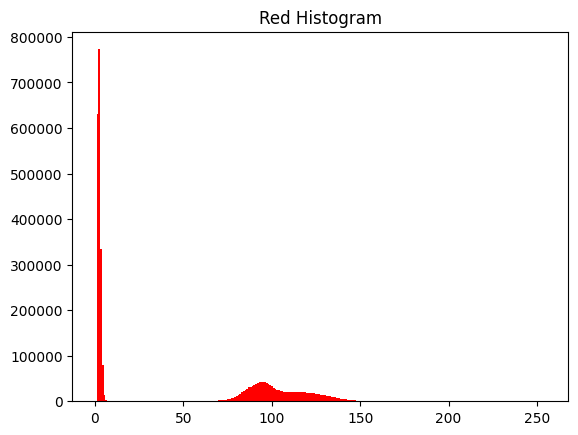

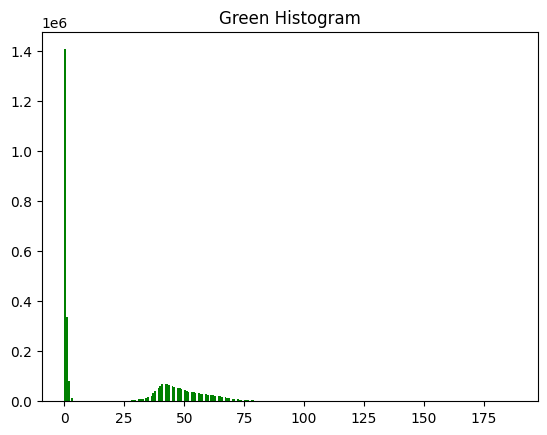

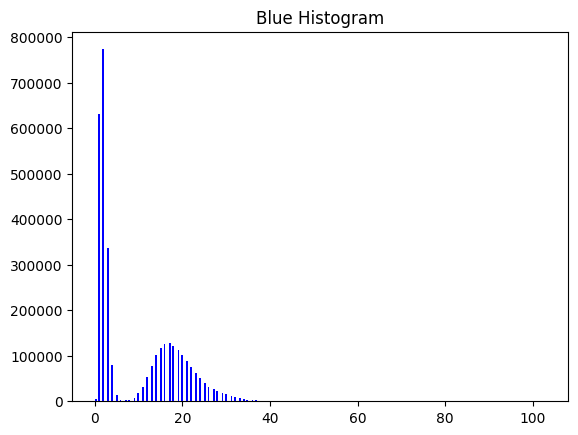

In [19]:
# Getting the RGB channels from the image
red_channel = img_nparray[:, :, 0] # Obtain the red channel
green_channel = img_nparray[:, :, 1] # Obtain the green channel
blue_channel = img_nparray[:, :, 2] # Obtain the blue channel

# Plot the red histogram with bins in a range of 256
plt.hist(red_channel.ravel(), bins=256, color='red')
# Set title and show
plt.title('Red Histogram')
plt.show()

# Plot the green histogram with bins in a range of 256
plt.hist(green_channel.ravel(), bins=256, color='green')
plt.title('Green Histogram')
plt.show()

# Plot the blue histogram with bins in a range of 256
plt.hist(blue_channel.ravel(), bins=256, color='blue')
plt.title('Blue Histogram')
plt.show()

#### Thresholding

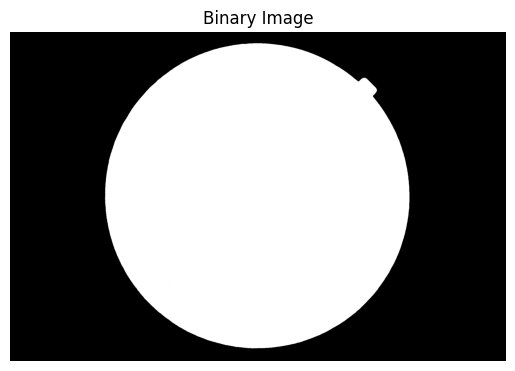

<class 'numpy.ndarray'> (1488, 2240)


In [20]:
# Binary Image
# Make the image grayscale using rgb2gray
img_gray = color.rgb2gray(img_nparray)
# Obtain the optimal threshold value with otsu
thresh = threshold_otsu(img_gray)
# Apply thresholding to the image
binary = img_gray > thresh
# Show the image
show_image(binary, 'Binary Image')

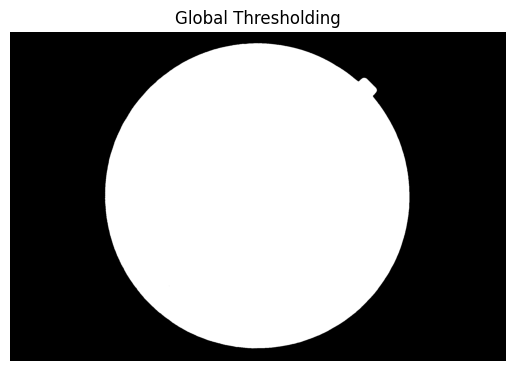

<class 'numpy.ndarray'> (1488, 2240)


In [21]:
# Global Thresholding
# Make the image grayscale using rgb2gray
img_gray = color.rgb2gray(img_nparray)
# Obtain the optimal otsu global thresh value
global_thresh = threshold_otsu(img_gray)
# Obtain the binary image by applying global thresholding
binary_global = img_gray > global_thresh
# Show the binary image obtained
show_image(binary_global, 'Global Thresholding')

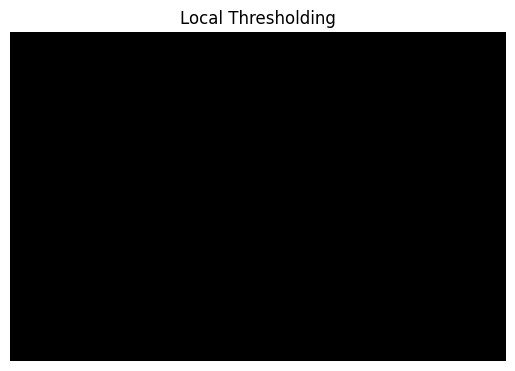

<class 'numpy.ndarray'> (1488, 2240)


In [22]:
# Local thresholding
# Make the image grayscale using rgb2gray
img_gray = color.rgb2gray(img_nparray)
# Set the block size to 35
block_size = 35
# Obtain the optimal local thresholding
local_thresh = threshold_local(img_gray, block_size, offset=10)
# Obtain the binary image by applying local thresholding
binary_local = img_gray > local_thresh
# Show the binary image
show_image(binary_local, 'Local Thresholding')

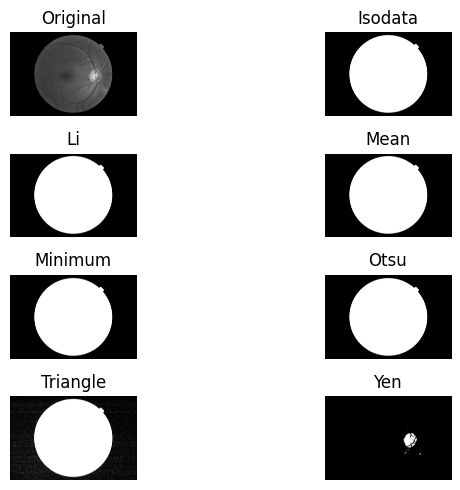

In [23]:
# Trying all thresholds
# Make the image grayscale using rgb2gray
img_gray = color.rgb2gray(img_nparray)
# Use the try all method on the resulting grayscale image
fig, ax = try_all_threshold(img_gray, verbose=False)
# Show the resulting plots
plt.show()

#### Hysteresis Thresholding

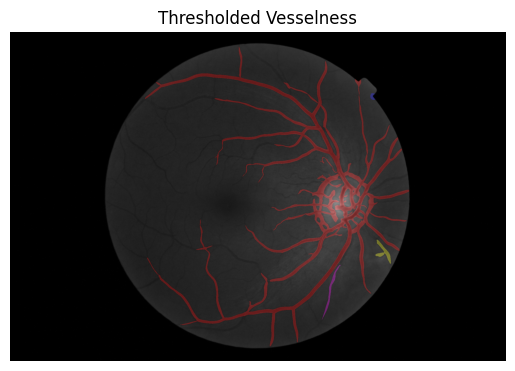

In [24]:
# Hysteresis Thresholding
retina = color.rgb2gray(img_nparray)
t0, t1 = filters.threshold_multiotsu(retina, classes=3)
mask = (retina > t0)
vessels = filters.sato(retina, sigmas=range(1, 10)) * mask

thresholded = filters.apply_hysteresis_threshold(vessels, 0.01, 0.03)
labeled = ndi.label(thresholded)[0]

_, ax = plt.subplots()
ax.imshow(color.label2rgb(labeled, retina))
ax.set_axis_off()
_ = ax.set_title('Thresholded Vesselness')

#### Applying the Vesselness Filter

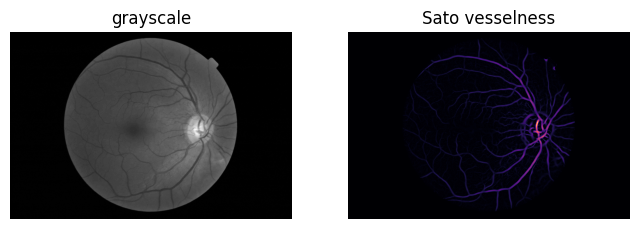

In [25]:
retina = color.rgb2gray(img_nparray)
t0, t1 = filters.threshold_multiotsu(retina, classes=3)
mask = (retina > t0)
vessels = filters.sato(retina, sigmas=range(1, 10)) * mask

_, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,8))
axes[0].imshow(retina, cmap='gray')
axes[0].set_axis_off()
axes[0].set_title('grayscale')
axes[1].imshow(vessels, cmap='magma')
axes[1].set_axis_off()
_ = axes[1].set_title('Sato vesselness')

#### Skelotonize

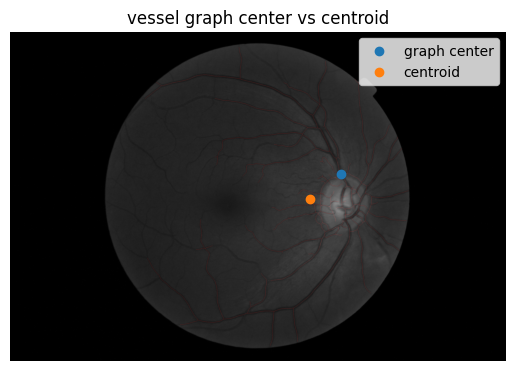

In [26]:
largest_nonzero_label = np.argmax(np.bincount(labeled[labeled > 0]))
binary = labeled == largest_nonzero_label
skeleton = morphology.skeletonize(binary)
g, nodes = graph.pixel_graph(skeleton, connectivity=2)
px, distances = graph.central_pixel(
        g, nodes=nodes, shape=skeleton.shape, partition_size=100
        )

centroid = measure.centroid(labeled > 0)

_, ax = plt.subplots()
ax.imshow(color.label2rgb(skeleton, retina))
ax.scatter(px[1], px[0], label='graph center')
ax.scatter(centroid[1], centroid[0], label='centroid')
ax.legend()
ax.set_axis_off()
ax.set_title('vessel graph center vs centroid')

plt.show()

#### Summary of Operations

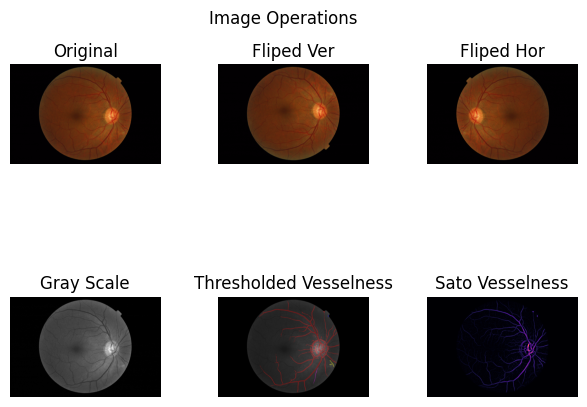

In [27]:
# setting different parameters to adjust each grid
fig, axs = plt.subplots(2, 3)
fig.tight_layout()
fig.suptitle('Image Operations')
axs[0,0].imshow(img_nparray, cmap='gray')
axs[0,0].set_axis_off()
axs[0,0].set_title('Original')
axs[0,1].imshow(img_flipud, cmap='gray')
axs[0,1].set_axis_off()
axs[0,1].set_title('Fliped Ver')
axs[0,2].imshow(img_fliplr, cmap='gray')
axs[0,2].set_axis_off()
axs[0,2].set_title('Fliped Hor')
axs[1,0].imshow(img_gray, cmap='gray')
axs[1,0].set_title('Gray Scale')
axs[1,0].set_axis_off()
axs[1,1].imshow(color.label2rgb(labeled, retina))
axs[1,1].set_axis_off()
axs[1,1].set_title('Thresholded Vesselness')
axs[1,2].imshow(vessels, cmap='magma')
axs[1,2].set_axis_off()
axs[1,2].set_title('Sato Vesselness')

#for ax in axs.flat:
#    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()